<a href="https://colab.research.google.com/github/Jhoe73/data_science/blob/main/Aula_analise_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#    **Análise de Regressão**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# importa o data set
df = pd.read_csv('Prestigio.csv')
df.head()

,occupation,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


In [ ]:
# Descreve os dados
df.describe()

,education,income,women,prestige,census
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333,5401.774510
std,2.728444,4245.922227,31.724931,17.204486,2644.993215
min,6.380000,611.000000,0.000000,14.800000,1113.000000
25%,8.445000,4106.000000,3.592500,35.225000,3120.500000
50%,10.540000,5930.500000,13.600000,43.600000,5135.000000
75%,12.647500,8187.250000,52.202500,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


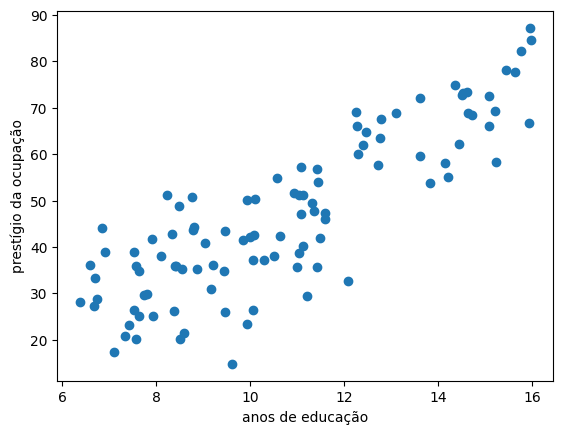

In [ ]:
# Constrói os gráficos de dispersão
plt.scatter(x=df.education,y=df.prestige)
plt.xlabel("anos de educação")
plt.ylabel("prestígio da ocupação")
plt.show()

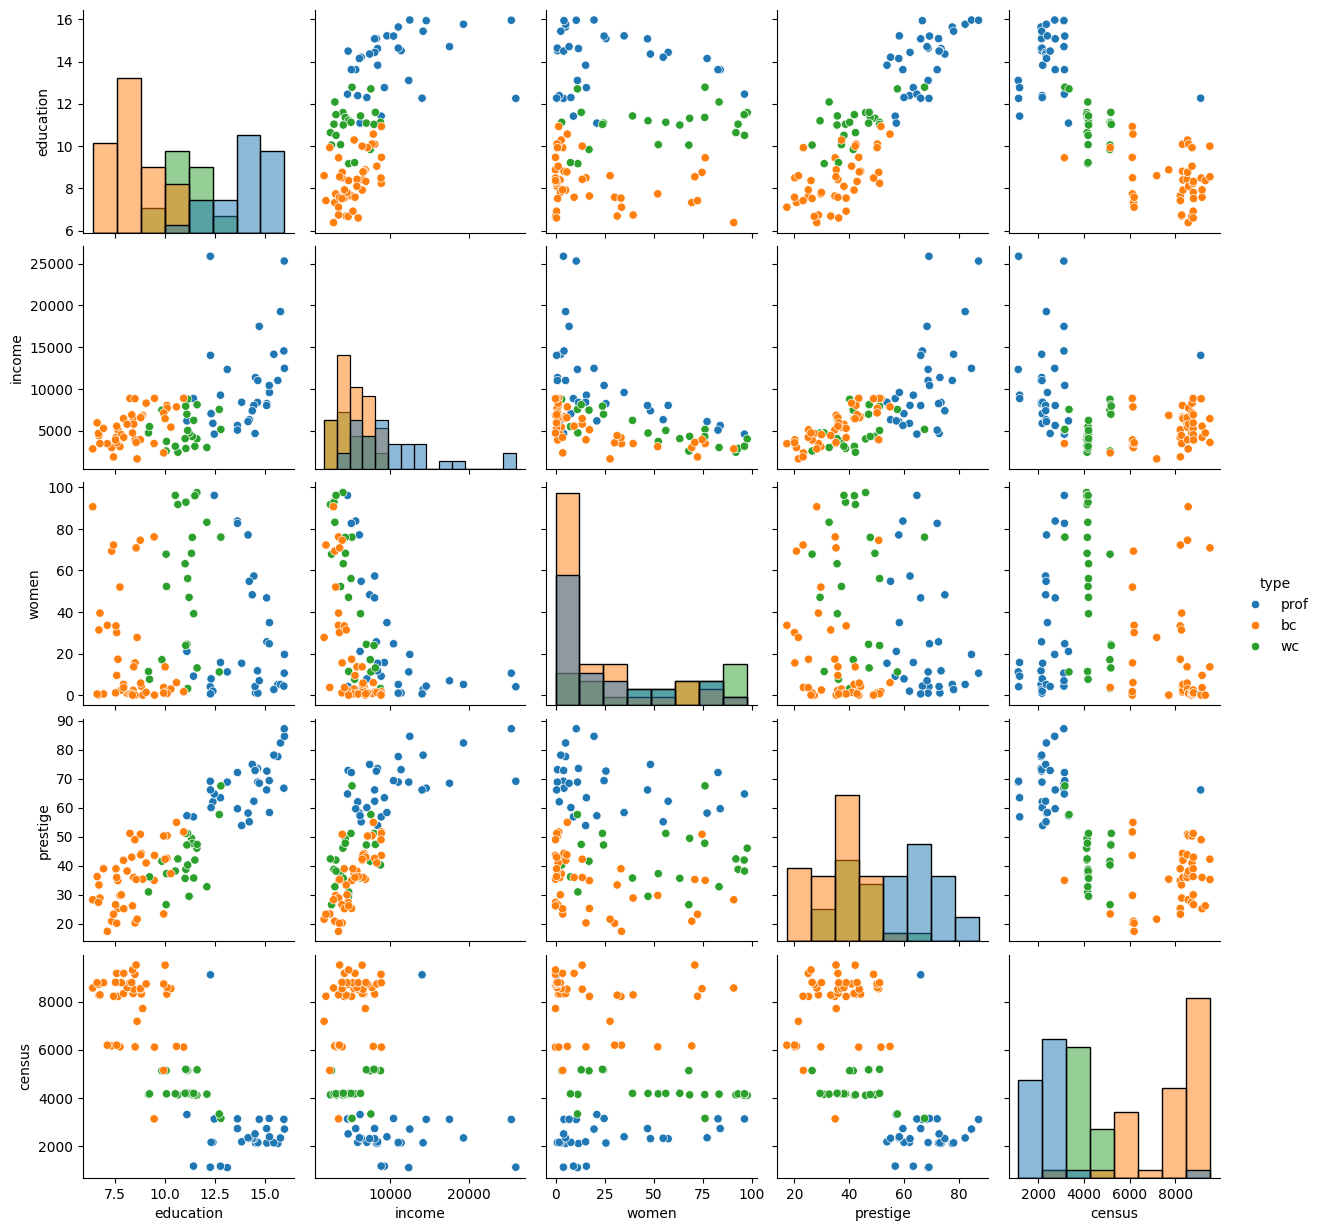

In [ ]:
import seaborn as sns

# Outra maneira, diferenciando por "type"
sns.pairplot(df, hue = 'type',diag_kind = "hist")

In [ ]:
from statsmodels.formula.api import ols

#Ajusta o modelo de regressão linear múltipla com Prestige como variável resposta
mod = ols('df.prestige ~ df.education',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     260.8
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.29e-29
Time:                        23:36:24   Log-Likelihood:                -369.00
No. Observations:                 102   AIC:                             742.0
Df Residuals:                     100   BIC:                             747.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.7320      3.677     -2.919   

In [ ]:
print(res.ssr)

8286.990127989602


In [ ]:
print(res.mse_total)

295.9943234323432


In [ ]:
from statsmodels.formula.api import ols

#Ajusta o modelo de regressão linear múltipla com Prestige como variável resposta
mod = ols('df.prestige ~ df.income + df.education + df.women',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.26e-34
Time:                        23:36:24   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.7943      3.239     -2.098   

In [ ]:
print(res.mse_total)

295.9943234323432


In [ ]:
print(res.ssr)

6033.570191102537


In [ ]:
# Calcula as variáveis centradas
income_c = df.income-np.mean(df.income)
education_c = df.education-np.mean(df.education)
women_c = df.women-np.mean(df.women)

# Modelo de regressão com as variáveis explicativas centradas
mod = ols('df.prestige ~ income_c + education_c + women_c',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.26e-34
Time:                        23:36:24   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.8333      0.777     60.281      

In [ ]:
print(res.ssr)

6033.570191102536


In [ ]:
# Modelo de regressão com a variável "income" transformada
l_income = np.log2(df.income) # base 2
le_income = np.log(df.income) # base e

mod = ols('df.prestige ~ l_income + df.education + df.women',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.21e-38
Time:                        23:36:24   Log-Likelihood:                -342.51
No. Observations:                 102   AIC:                             693.0
Df Residuals:                      98   BIC:                             703.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -110.9658     14.843     -7.476   

In [ ]:
print(res.ssr)

4929.8853738564885


In [ ]:
# Estimativa da variância do erro (sigma2), que é o MSE=SQE/(n-p)
res.mse_resid

50.30495279445397

In [ ]:
# valores preditos de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

Elabora os gráficos de todos os resíduos

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Jhoe\AppData\Local\Temp\ipykernel_10876\1149230662.py:3: SyntaxWarning: invalid escape sequence '\h'
  ax1.set_ylabel('$y-\hat{y}$')
C:\Users\Jhoe\AppData\Local\Temp\ipykernel_10876\1149230662.py:12: SyntaxWarning: invalid escape sequence '\h'
  ax3.set_xlabel('$\hat{Y}$')


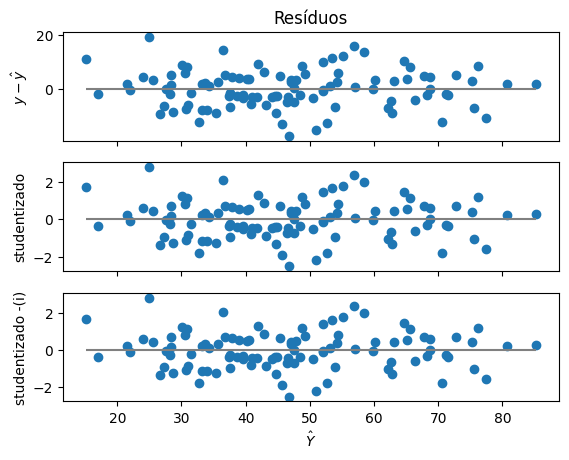

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

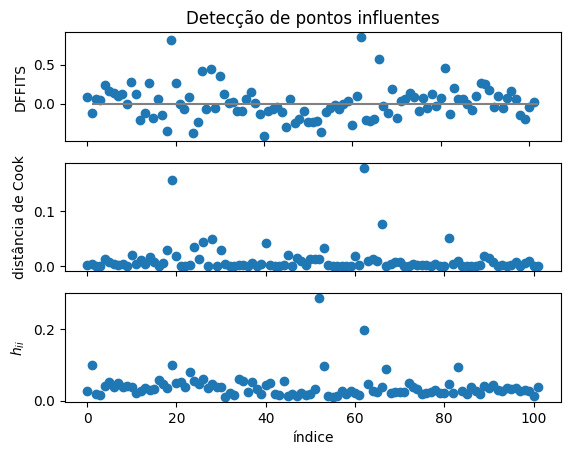

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
ax1.hlines(0,xmin=1,xmax=102,color='gray')
ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')
ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

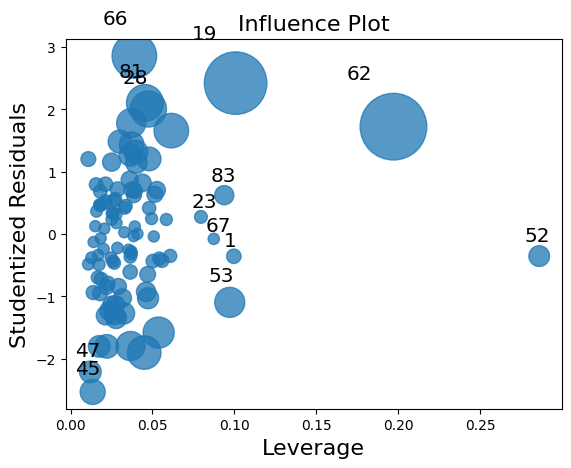

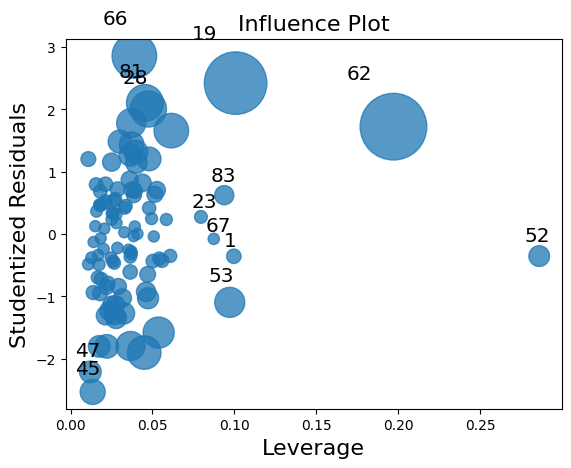

In [ ]:
import statsmodels.api as sm

# Gráficos dos resíduos
sm.graphics.influence_plot(res)

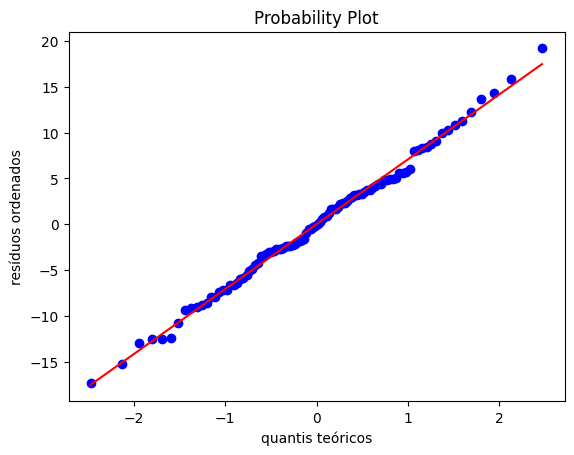

In [ ]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

In [ ]:
import pandas as pd

# Transforma variável categorizada para o modelo de regressão
dummies = pd.get_dummies(df.type, drop_first=True)
df.join(dummies)

,occupation,education,income,women,prestige,census,type,prof,wc
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof,True,False
1,general.managers,12.26,25879,4.02,69.1,1130,prof,True,False
2,accountants,12.77,9271,15.70,63.4,1171,prof,True,False
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof,True,False
4,chemists,14.62,8403,11.68,73.5,2111,prof,True,False
...,...,...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc,False,False
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc,False,False
99,longshoremen,8.37,4753,0.00,26.1,9313,bc,False,False
100,typesetters,10.00,6462,13.58,42.2,9511,bc,False,False


In [ ]:
l_income = np.log2(df.income) # base 2
le_income = np.log(df.income) # base e

# Modelo de regressão com a variável "income" transformada e variável type
mod = ols('df.prestige ~ l_income+df.education+df.women+df.type',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.71e-38
Time:                        23:36:26   Log-Likelihood:                -318.49
No. Observations:                  98   AIC:                             649.0
Df Residuals:                      92   BIC:                             664.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -115.6722     18.802     

In [ ]:
# Modelo de regressão com interação entre variáveis
mod = ols('df.prestige ~ df.type*(df.income)',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     88.94
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.08e-33
Time:                        23:36:26   Log-Likelihood:                -330.34
No. Observations:                  98   AIC:                             672.7
Df Residuals:                      92   BIC:                             688.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

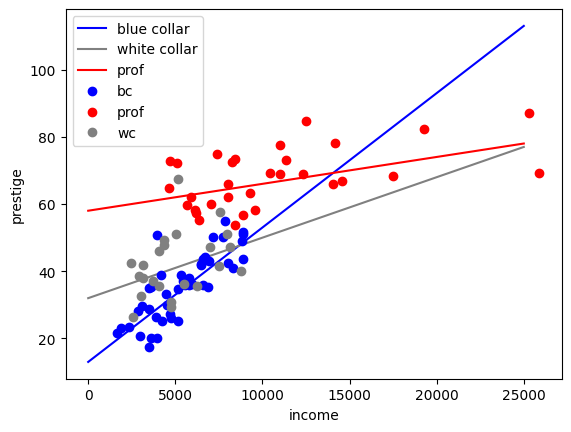

In [ ]:
import itertools

##### Entendendo o que é a interação
x = np.linspace(0,25000)
y1 = 13 + 0.004*x # blue collar
y2 =(13+18.98) + (0.004-0.0022)*x # white collar
y3 = (13+45) + (0.004-0.0032)*x    # prof

plt.plot(x, y1, label="blue collar", color="blue")
plt.plot(x, y2, label="white collar", color="gray")
plt.plot(x, y3, label="prof",color="red")
colors = itertools.cycle(["b", "r", "gray"])
groups = df.groupby("type")
for name, group in groups:
    plt.plot(group["income"], group["prestige"], marker="o", linestyle="", label=name, color=next(colors))
plt.legend()
plt.xlabel("income")
plt.ylabel("prestige")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula o fator de inflação da variância para as variávis explicativas do modelo (VIF)
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(vif)

[18.611896850702156, 7.38744400755835, 9.510575627431631, 10.038341415063352, 22.465671477980585, 9.484758011376671]
